In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
dataset = pd.read_csv('creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
len(dataset[dataset['Class']==0])/dataset.shape[0]

0.9982725143693799

In [ ]:
len(dataset[dataset['Class']==1])

492

In [ ]:
dataset_0 = dataset[dataset['Class']==0].sample(frac=0.002)

In [ ]:
dataset_0.shape

(569, 31)

In [ ]:
dataset_1 = dataset[dataset['Class']==1]

In [ ]:
dataset = pd.concat([dataset_1,dataset_0],axis=0)

In [ ]:
dataset = dataset.sample(frac=1)

In [ ]:
len(dataset[dataset['Class']==0])/dataset.shape[0]

0.5362865221489161

In [ ]:
dataset.shape

(1061, 31)

In [ ]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
154587,102114.0,-28.255053,21.467203,-26.871339,11.737436,-17.999630,6.065901,-41.506796,-38.987263,-13.434066,-24.403185,3.409323,-9.608267,-3.076318,0.240060,-2.836677,-6.594757,-12.957531,-5.613522,-0.248828,10.440718,-21.453736,8.361985,4.909111,0.098328,-1.508739,0.008711,-5.407824,-0.183811,0.00,1
219025,141565.0,0.114965,0.766762,-0.494132,0.116772,0.868169,-0.477982,0.438496,0.063073,-0.186207,-0.159325,1.200304,0.281744,-0.623844,-0.658246,-0.155888,0.056227,0.653662,0.334655,1.028927,0.062199,-0.284413,-0.706865,0.131405,0.600742,-0.604264,0.262938,0.099145,0.010810,4.49,1
111584,72283.0,1.172897,0.738658,0.107346,2.498045,0.274569,-0.803469,0.679858,-0.352219,-1.224433,0.691076,-0.345291,0.463186,1.063943,0.308158,0.089856,0.281557,-0.538626,-0.629613,-0.903899,-0.035023,0.015461,0.010729,-0.143306,0.428522,0.756315,0.061326,-0.038212,0.017675,32.71,0
261473,160034.0,-2.349340,1.512604,-2.647497,1.753792,0.406328,-2.188494,-0.686935,-0.547984,-0.099528,-1.672346,2.172976,-3.103477,0.217561,-6.034403,0.164401,-2.383826,-4.166479,-1.772397,-0.526281,-0.093421,-0.088519,-0.595178,0.258148,0.061901,-0.354180,-1.152671,-0.736073,0.733703,4.90,1
15457,26842.0,1.082056,-0.109534,1.385093,1.377842,-1.000742,0.065501,-0.657617,0.232054,0.933600,-0.234013,-0.352918,0.436720,-0.493688,-0.221402,0.455211,-0.288953,0.175351,-0.563105,-0.690839,-0.201410,-0.017081,0.164306,0.068570,0.385761,0.282179,-0.397893,0.086132,0.037516,11.50,0


In [ ]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000
mean,89471.100848,-2.162107,1.715955,-3.289352,2.118687,-1.393698,-0.652794,-2.563603,0.266119,-1.176529,-2.594901,1.746634,-2.903178,-0.021866,-3.232229,-0.060501,-1.902590,-3.107667,-1.031642,0.310137,0.197267,0.358065,0.023612,-0.021387,-0.023809,0.020157,0.011869,0.074918,0.028950,100.346456,0.463713
std,48524.641570,5.365507,3.563822,6.051223,3.168955,4.092137,1.710943,5.684626,4.689052,2.313235,4.490398,2.747761,4.498624,1.055932,4.598587,0.983452,3.409747,5.812213,2.352799,1.248510,1.032976,2.705243,1.146658,1.126474,0.570908,0.672270,0.493617,0.977606,0.425639,228.052729,0.498917
min,406.000000,-30.552380,-8.402154,-31.103685,-4.519509,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,-24.588262,-2.306661,-18.683715,-3.211041,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-3.681904,-4.128186,-22.797604,-8.887017,-19.254328,-2.409839,-4.781606,-1.251464,-7.263482,-3.707261,0.000000,0.000000
25%,47923.000000,-2.535852,-0.108106,-4.759158,-0.132622,-1.614608,-1.497423,-2.792379,-0.233403,-2.042708,-4.170623,-0.321383,-5.095032,-0.773695,-6.332513,-0.613803,-3.129421,-4.961534,-1.643704,-0.420781,-0.189452,-0.142415,-0.512626,-0.229869,-0.388325,-0.320311,-0.312017,-0.059658,-0.059303,1.790000,0.000000
50%,84204.000000,-0.735337,0.843963,-1.301287,1.201849,-0.336642,-0.635575,-0.509995,0.141500,-0.667939,-0.728805,1.005805,-0.634357,0.022937,-0.786277,-0.014900,-0.522790,-0.500309,-0.279955,0.169741,0.023200,0.143312,0.055179,-0.022468,0.034639,0.060089,-0.050545,0.044633,0.032781,18.980000,0.000000
75%,135920.000000,1.101108,2.618584,0.315206,3.987828,0.622800,0.106493,0.295459,0.794851,0.215475,0.092725,3.394152,0.257697,0.718249,0.249884,0.608415,0.369236,0.238918,0.355530,0.946110,0.417199,0.603958,0.576552,0.193939,0.397041,0.395117,0.304883,0.395171,0.208830,99.850000,1.000000
max,172457.000000,2.319420,22.057729,2.954144,12.114672,11.095089,6.474115,5.802537,20.007208,8.119419,12.816178,12.018913,3.692101,3.158255,4.010070,3.410259,3.139656,6.739384,3.790316,5.228342,11.059004,27.202839,8.361985,5.466230,3.450094,2.208209,2.859167,3.052358,1.779364,2189.000000,1.000000


In [ ]:
X = dataset.drop('Class',axis=1)
y = dataset['Class']

In [ ]:
print(y)

154587    1
219025    1
111584    0
261473    1
15457     0
         ..
18172     0
17366     1
17268     0
281674    1
201601    1
Name: Class, Length: 1061, dtype: int64


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,shuffle='Class')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
prediction = lr.predict(X_test)

In [ ]:
accuracy_score(y_test,prediction)

0.9295774647887324

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from seaborn import heatmap

In [ ]:
acc_log_train=round(lr.score(X_train,y_train)*100,2)
acc_log_test=round(lr.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Test Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 94.81
Test Accuracy: % 92.96


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


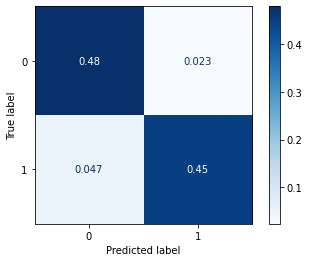

In [ ]:
plot_confusion_matrix(lr, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')

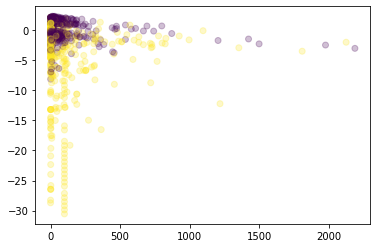

In [ ]:
fig, ax = plt.subplots()

y_map = lr.predict(X_test)

ax.scatter(x=X_train['Amount'], y=X_train['V1'], c=y_train, alpha=.25)
